<a href="https://colab.research.google.com/github/apollo13092808/pytorch-tutorial-youtube/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style(style="darkgrid")

In [3]:
warnings.filterwarnings(action="ignore")

In [4]:
df = pd.read_csv("/content/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [6]:
df["variety"] = df["variety"].map({"Setosa": 0, "Versicolor": 1, "Virginica": 2})
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.drop(columns=["variety"], axis=1).values
y = df["variety"].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [10]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [11]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

Using cuda device


In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, inputs=4, layer1=8, layer2=9, outputs=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features=inputs, out_features=layer1)
        self.fc2 = nn.Linear(in_features=layer1, out_features=layer2)
        self.out = nn.Linear(in_features=layer2, out_features=outputs)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.out(x))
        return x

In [13]:
torch.manual_seed(42)

model = NeuralNetwork()

In [14]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

In [15]:
losses = []

EPOCHS = 100
for e in range(1, EPOCHS + 1):
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    losses.append(loss.detach().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 10 == 0:
        print(f"Epoch: {e:>3} | Loss: {loss}")

Epoch:  10 | Loss: 1.0341880321502686
Epoch:  20 | Loss: 0.9698107838630676
Epoch:  30 | Loss: 0.9306958913803101
Epoch:  40 | Loss: 0.8895543813705444
Epoch:  50 | Loss: 0.8017310500144958
Epoch:  60 | Loss: 0.6994033455848694
Epoch:  70 | Loss: 0.6277065873146057
Epoch:  80 | Loss: 0.5980890989303589
Epoch:  90 | Loss: 0.5875272154808044
Epoch: 100 | Loss: 0.5831078290939331


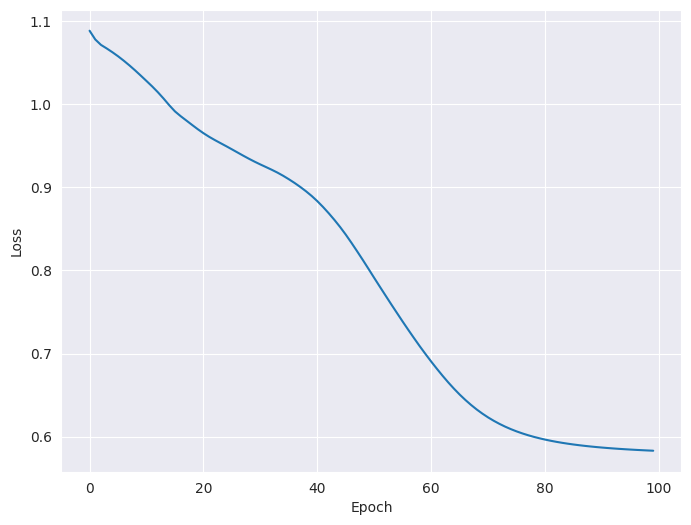

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(EPOCHS), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [17]:
with torch.no_grad():
    y_pred = model(X_test)
    loss = loss_fn(y_pred, y_test)

print(loss)

tensor(0.5819)


In [18]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        # print(f"{i + 1:>2} | {str(y_pred)} | {y_test[i]}")
        if y_pred.argmax().item() == y_test[i]:
            correct += 1

print(f"Got {correct} correct.")

Got 30 correct.


In [19]:
new_iris = torch.tensor([4.7, 1.2, 4.3, 0.2])

with torch.no_grad():
    pred = model(new_iris)
    if pred.argmax().item() == 0:
        predicted = "Setosa"
    elif pred.argmax().item() == 1:
        predicted = "Versicolor"
    elif pred.argmax().item() == 2:
        predicted = "Virginica"

print(f"Predicted: {predicted}")

Predicted: Versicolor


In [20]:
torch.save(obj=model.state_dict(), f="iris_model.pt")

In [21]:
new_model = NeuralNetwork()
new_model.load_state_dict(torch.load(f="iris_model.pt"))

<All keys matched successfully>